MACHINE LEARNING PREDICTION OF CORRELATES OF ELEVATED BLOOD GLUCOSE IN A NIGERIAN COHORT OF
CLINICALLY HEALTHY INDIVIDUALS

By

Kolapo Oyebola (PhD)

**Objective**: The objective of this project is to develop a machine learning model for predicting elevated blood glucose which is a marker of diabetes. The study collected medical history, clinical screening, oral examination and demographic information of apparently healthy individuals. Such a prediction can be immensely valuable for healthcare professionals in identifying individuals who may be at risk of developing diabetes. Furthermore, pharmaceutical companies are also interested in these predictions as they can aid in customer profiling and developing tailored treatment plans.

**Dataset**: The dataset used for this project is the NIH-K43 Community Screening dataset obtained from asymptomatic residents of Ijede Community in Lagos, Nigeria. The dataset comprises a comprehensive collection of clinical, medical and demographic data, along with their diabetes status (positive or negative). The dataset encompasses several essential features including age, gender, body mass index (BMI), electrocardiography, smoking history, blood glucose level, smoking status, blood pressure, cholesterol etc.

**Methodology**: In this project, we will focus on comparing the accuracy scores of various models to identify the most effective model for predicting high blood sugar. By leveraging the dataset's predictors, we will construct and evaluate multiple models, each employing different algorithms or techniques. The performance of these models will be assessed based on their accuracy in predicting blood sugar. We will also determine feature importance to predict the most importance correlates of possible diabetes in the population.

**Significance**: The implications of accurately predicting blood sugar level are substantial for both healthcare professionals and pharmaceutical companies. For healthcare professionals, these predictions can assist in early identification of individuals at risk of diabetes, facilitating the implementation of preventive measures and personalized treatment plans. Pharmaceutical companies can leverage such predictions for customer profiling, enabling targeted marketing efforts and tailored interventions.

Description of features:

1. Age:
2. Sex:
3. BMI:


1. Installation and importation

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pickle
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.decomposition import PCA
import pylab as pl
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)
from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

In [61]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Exploratory data analysis

In [4]:
from google.colab import files
uploaded = files.upload()

Saving nihresults.csv to nihresults.csv


In [74]:
import io
data = pd.read_csv(io.BytesIO(uploaded['nihresults.csv']))

In [75]:
data

,Age,Sex,BMI,Smoking_status,ECG,Hemoglobin,Cholesterol,Uric acid,Blood glucose,Systolic_blood_pressure,...,Elevated_BP,PreHTN,HTN,Isolated _systolic_hypertension,Isolated_diastolic_hypertension,Prediabetes,Diabetes,Normal_glucose,Abnormal_ECG_values,Normal_ECG_Values
0,59,0,39.22,0,76.00,11.94,25.00,4.38,122.00,140,...,0,0,0,0,0,0,0,1,0,1
1,56,1,24.68,0,77.00,12.36,200.00,NaN,109.00,115,...,0,0,0,0,0,0,0,1,0,1
2,65,1,31.20,0,110.00,14.42,257.00,5.95,168.00,118,...,0,0,0,0,0,1,0,0,1,0
3,57,0,34.58,0,93.00,7.57,378.00,14.50,101.00,138,...,0,1,0,0,0,0,0,1,0,1
4,44,0,27.57,0,94.00,8.43,209.00,1.78,114.00,107,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,39,0,29.85,0,88.00,NaN,176.00,8.82,128.00,103,...,0,0,0,0,0,0,0,1,0,1
191,50,0,31.86,0,92.00,NaN,228.00,3.95,133.00,168,...,0,0,1,0,0,0,0,1,0,1
192,29,1,21.31,0,57.00,NaN,169.00,8.30,113.00,119,...,0,0,0,0,0,0,0,1,0,1
193,25,1,20.12,0,98.00,NaN,208.00,4.70,129.00,133,...,0,1,0,0,0,0,0,1,0,1


In [76]:
data.head()

,Age,Sex,BMI,Smoking_status,ECG,Hemoglobin,Cholesterol,Uric acid,Blood glucose,Systolic_blood_pressure,...,Elevated_BP,PreHTN,HTN,Isolated _systolic_hypertension,Isolated_diastolic_hypertension,Prediabetes,Diabetes,Normal_glucose,Abnormal_ECG_values,Normal_ECG_Values
0,59,0,39.22,0,76.00,11.94,25.00,4.38,122.00,140,...,0,0,0,0,0,0,0,1,0,1
1,56,1,24.68,0,77.00,12.36,200.00,NaN,109.00,115,...,0,0,0,0,0,0,0,1,0,1
2,65,1,31.20,0,110.00,14.42,257.00,5.95,168.00,118,...,0,0,0,0,0,1,0,0,1,0
3,57,0,34.58,0,93.00,7.57,378.00,14.50,101.00,138,...,0,1,0,0,0,0,0,1,0,1
4,44,0,27.57,0,94.00,8.43,209.00,1.78,114.00,107,...,0,0,0,0,0,0,0,1,0,1


In [77]:
data.isnull().sum()

Age                                 0
Sex                                 0
BMI                                 0
Smoking_status                      0
ECG                                 3
Hemoglobin                         70
Cholesterol                         7
Uric acid                          11
Blood glucose                       5
Systolic_blood_pressure             0
Diastolic_blood_pressure            0
Normal_BP                           0
Elevated_BP                         0
PreHTN                              0
HTN                                 0
Isolated _systolic_hypertension     0
Isolated_diastolic_hypertension     0
Prediabetes                         0
Diabetes                            0
Normal_glucose                      0
Abnormal_ECG_values                 0
Normal_ECG_Values                   0
dtype: int64

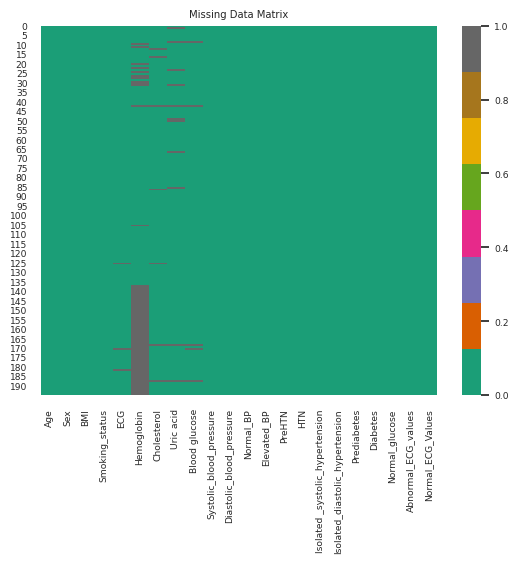

In [78]:
#Visualizing missing values
sns.heatmap(data.isnull(), cmap = 'Dark2')
plt.title("Missing Data Matrix")
images_dir = '/content/gdrive/My Drive/Images_for_diabetes_prediction_NIH'
plt.savefig(f"{images_dir}/null_visualization_before_cleaning.jpeg")

In [79]:
data.dtypes

Age                                  int64
Sex                                  int64
BMI                                float64
Smoking_status                       int64
ECG                                float64
Hemoglobin                         float64
Cholesterol                        float64
Uric acid                          float64
Blood glucose                      float64
Systolic_blood_pressure              int64
Diastolic_blood_pressure             int64
Normal_BP                            int64
Elevated_BP                          int64
PreHTN                               int64
HTN                                  int64
Isolated _systolic_hypertension      int64
Isolated_diastolic_hypertension      int64
Prediabetes                          int64
Diabetes                             int64
Normal_glucose                       int64
Abnormal_ECG_values                  int64
Normal_ECG_Values                    int64
dtype: object

In [80]:
#Replace missing values with mean (for continuous variables) or mode (for categorical variables)

data['ECG'].fillna(data['ECG'].mean(), inplace = True)
data['Hemoglobin'].fillna(data['Hemoglobin'].mean(), inplace = True)
data['Cholesterol'].fillna(data['Cholesterol'].mean(), inplace = True)
data['Uric acid'].fillna(data['Uric acid'].mean(), inplace = True)
data['Blood glucose'].fillna(data['Blood glucose'].mean(), inplace = True)

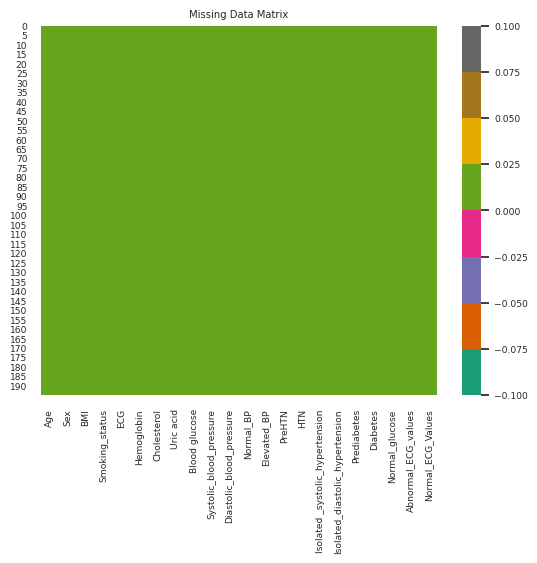

In [81]:
#Let's check if there are still null values
data.isnull().sum()
#Visualizing missing values
sns.heatmap(data.isnull(), cmap = 'Dark2')
plt.title("Missing Data Matrix")
images_dir = '/content/gdrive/My Drive/Images_for_diabetes_prediction_NIH'
plt.savefig(f"{images_dir}/null_visualization_after_cleaning.jpeg")

No more null values

In [82]:
#We will drop redundant columns and create dummy variables
data.drop(columns=['ECG', 'Prediabetes', 'Diabetes', 'Blood glucose', 'Abnormal_ECG_values','Isolated _systolic_hypertension', 'Isolated_diastolic_hypertension'], axis=1, inplace=True)
data

,Age,Sex,BMI,Smoking_status,Hemoglobin,Cholesterol,Uric acid,Systolic_blood_pressure,Diastolic_blood_pressure,Normal_BP,Elevated_BP,PreHTN,HTN,Normal_glucose,Normal_ECG_Values
0,59,0,39.22,0,11.94,25.00,4.38,140,84,0,0,0,0,1,1
1,56,1,24.68,0,12.36,200.00,5.97,115,68,1,0,0,0,1,1
2,65,1,31.20,0,14.42,257.00,5.95,118,74,1,0,0,0,0,0
3,57,0,34.58,0,7.57,378.00,14.50,138,84,0,0,1,0,1,1
4,44,0,27.57,0,8.43,209.00,1.78,107,59,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,39,0,29.85,0,11.68,176.00,8.82,103,63,1,0,0,0,1,1
191,50,0,31.86,0,11.68,228.00,3.95,168,102,0,0,0,1,1,1
192,29,1,21.31,0,11.68,169.00,8.30,119,67,1,0,0,0,1,1
193,25,1,20.12,0,11.68,208.00,4.70,133,83,0,0,1,0,1,1


In [83]:
#Let's recode the values in the target column
data['Normal_glucose'].replace(to_replace = 0, value = 'High', inplace = True)
data['Normal_glucose'].replace(to_replace = 1, value = 'Normal', inplace = True)

In [84]:
data['Normal_ECG_Values'].replace(to_replace = 0, value = 'High', inplace = True)
data['Normal_ECG_Values'].replace(to_replace = 1, value = 'Normal', inplace = True)

In [85]:
data['Normal_glucose'].replace(to_replace = 'High', value = 1, inplace = True)
data['Normal_glucose'].replace(to_replace = 'Normal', value = 0, inplace = True)
data['Normal_ECG_Values'].replace(to_replace = 'High', value = 1, inplace = True)
data['Normal_ECG_Values'].replace(to_replace = 'Normal', value = 0, inplace = True)

In [86]:
data.rename(columns = {'Normal_glucose':'Blood_glucose', 'Normal_ECG_Values':'ECG_values'}, inplace = True)

In [87]:
data.head()

,Age,Sex,BMI,Smoking_status,Hemoglobin,Cholesterol,Uric acid,Systolic_blood_pressure,Diastolic_blood_pressure,Normal_BP,Elevated_BP,PreHTN,HTN,Blood_glucose,ECG_values
0,59,0,39.22,0,11.94,25.00,4.38,140,84,0,0,0,0,0,0
1,56,1,24.68,0,12.36,200.00,5.97,115,68,1,0,0,0,0,0
2,65,1,31.20,0,14.42,257.00,5.95,118,74,1,0,0,0,1,1
3,57,0,34.58,0,7.57,378.00,14.50,138,84,0,0,1,0,0,0
4,44,0,27.57,0,8.43,209.00,1.78,107,59,1,0,0,0,0,0


Column names 'Normal_glucose' and 'Normal_ECG_values' have now been changed to 'Blood_glucose' and 'ECG' respectively. For Blood_glucose, 0 = Normal; 1 = Outside normal range. For ECG, 0 = Normal, 1 = Outside normal range

In [88]:
#Check and drop duplicate rows
data.drop_duplicates(inplace=True)
data

,Age,Sex,BMI,Smoking_status,Hemoglobin,Cholesterol,Uric acid,Systolic_blood_pressure,Diastolic_blood_pressure,Normal_BP,Elevated_BP,PreHTN,HTN,Blood_glucose,ECG_values
0,59,0,39.22,0,11.94,25.00,4.38,140,84,0,0,0,0,0,0
1,56,1,24.68,0,12.36,200.00,5.97,115,68,1,0,0,0,0,0
2,65,1,31.20,0,14.42,257.00,5.95,118,74,1,0,0,0,1,1
3,57,0,34.58,0,7.57,378.00,14.50,138,84,0,0,1,0,0,0
4,44,0,27.57,0,8.43,209.00,1.78,107,59,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,39,0,29.85,0,11.68,176.00,8.82,103,63,1,0,0,0,0,0
191,50,0,31.86,0,11.68,228.00,3.95,168,102,0,0,0,1,0,0
192,29,1,21.31,0,11.68,169.00,8.30,119,67,1,0,0,0,0,0
193,25,1,20.12,0,11.68,208.00,4.70,133,83,0,0,1,0,0,0


In [89]:
#Let's look at the distribution of the dataset
data.describe()

,Age,Sex,BMI,Smoking_status,Hemoglobin,Cholesterol,Uric acid,Systolic_blood_pressure,Diastolic_blood_pressure,Normal_BP,Elevated_BP,PreHTN,HTN,Blood_glucose,ECG_values
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,44.39,0.39,27.42,0.06,11.68,193.59,5.97,131.41,79.32,0.32,0.04,0.09,0.21,0.16,0.27
std,15.07,0.49,6.05,0.23,1.60,40.63,13.31,23.11,18.07,0.47,0.20,0.29,0.41,0.37,0.45
min,18.00,0.00,15.71,0.00,5.27,25.00,1.54,92.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,33.00,0.00,23.12,0.00,11.40,171.50,3.18,116.00,69.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,43.00,0.00,26.35,0.00,11.68,193.59,4.35,127.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,56.00,1.00,31.21,0.00,12.10,217.00,5.95,146.00,88.00,1.00,0.00,0.00,0.00,0.00,1.00
max,83.00,1.00,48.48,1.00,16.71,378.00,165.00,264.00,224.00,1.00,1.00,1.00,1.00,1.00,1.00


Count_of_0%: 83.58974358974359
Count_of_1%: 16.41025641025641


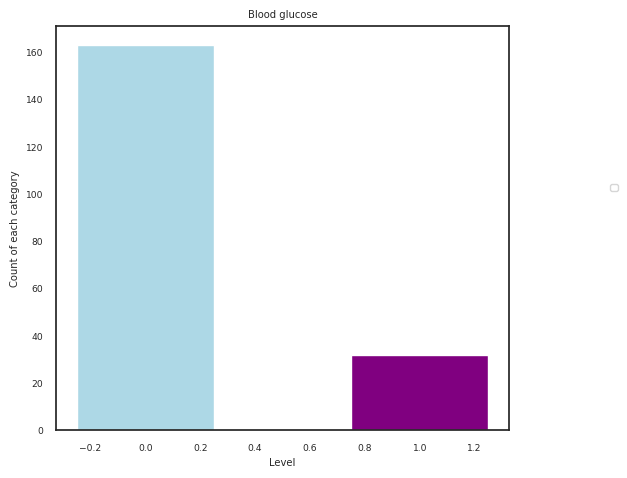

In [90]:
#Cursory look at the dependent variable (Blood_sugar)
color = ['lightblue', 'purple']
value_counts = data['Blood_glucose'].value_counts()
plt.bar(value_counts.index, value_counts.values, width = 0.5, color=color)
plt.xlabel('Level')
plt.ylabel('Count of each category')
plt.title('Blood glucose')
plt.legend(bbox_to_anchor = (1.25, 0.6), loc ="center right")
plt.tight_layout()
data['Blood_glucose'].value_counts()
images_dir = '/content/gdrive/My Drive/Images_for_diabetes_prediction_NIH'
plt.savefig(f"{images_dir}/Blood glucose class imbalance.jpeg")
print('Count_of_0%: {}'.format(100 *(len(data[data['Blood_glucose'] == 0])/len(data))))
print('Count_of_1%: {}'.format(100 *(len(data[data['Blood_glucose'] == 1])/len(data))))

Data is not balance. We will apply SMOTE technique much later before deploying machine learning models. For now,

a. we will check for outliers
b. look at the univariate distribution
c. we'll also see how the features compare.

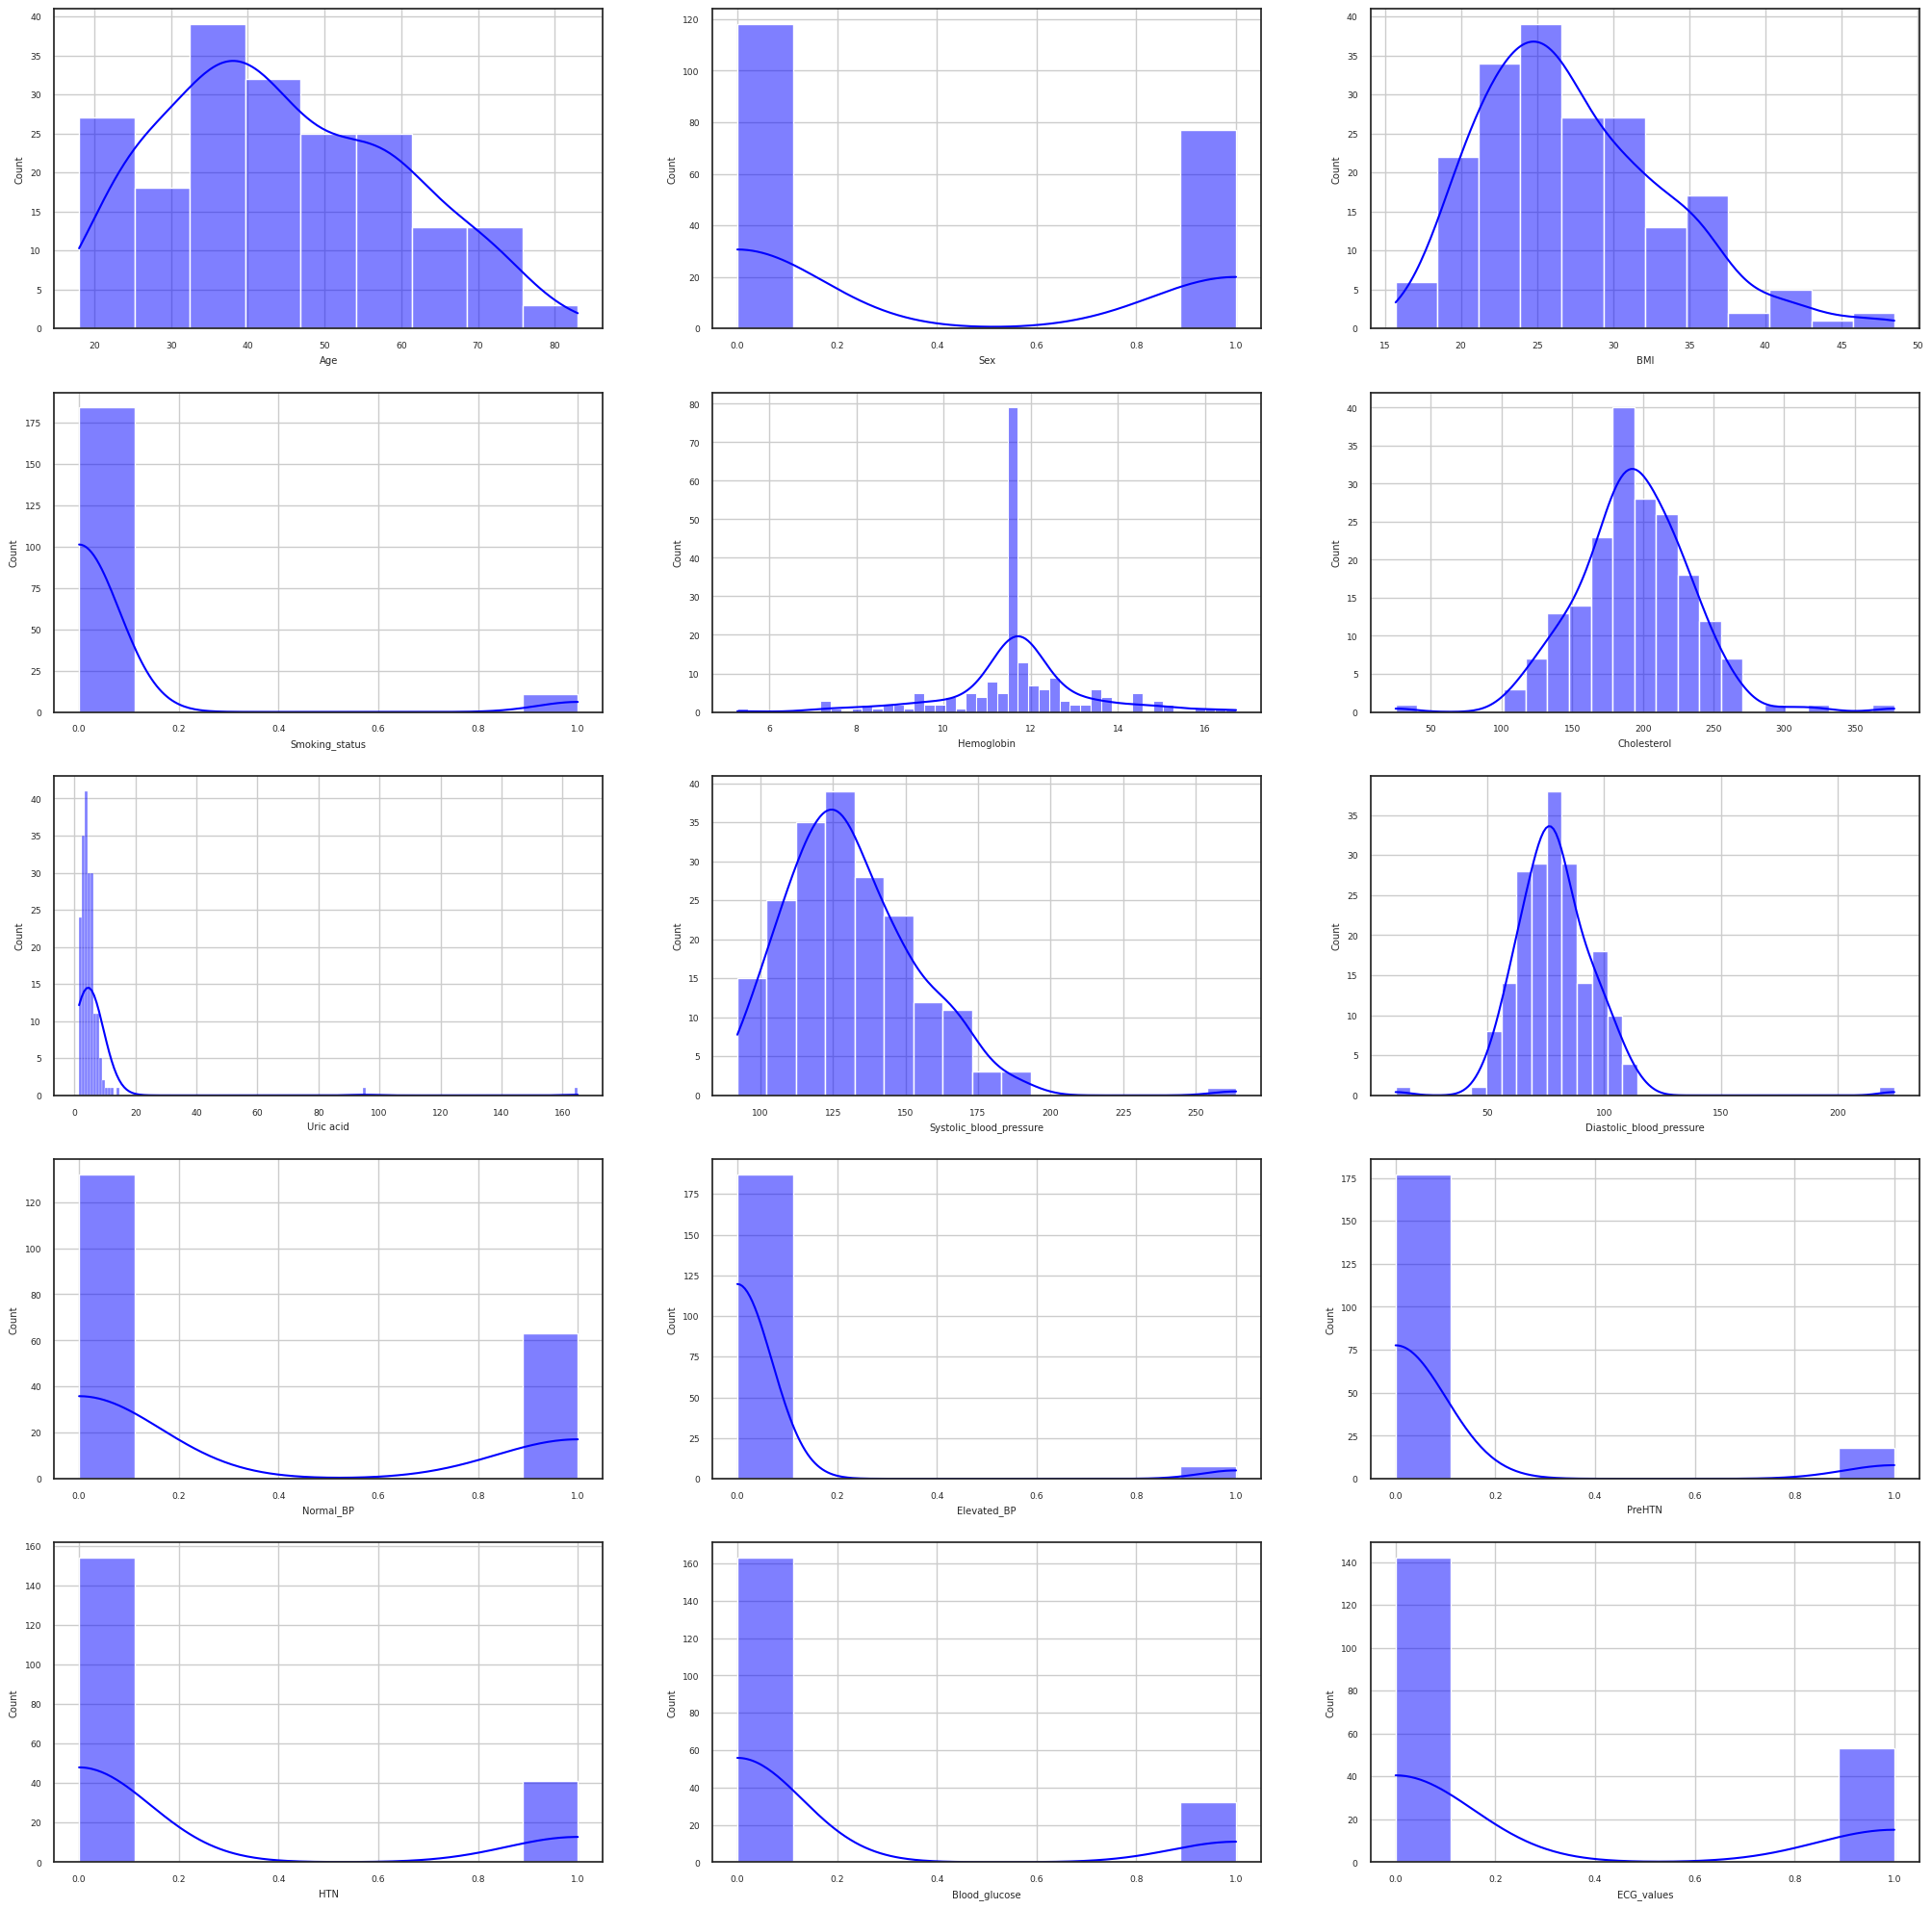

In [91]:
#Let's look at univariate (value) distribution
plt.figure(figsize = (25, 25))
for i in range(15):
    plt.subplot(5, 3, i+1)
    sns.histplot(data.iloc[:, i], color = 'blue', kde=True)
    plt.grid()
plt.savefig(f"{images_dir}/univariate_distribution.jpeg")

In [92]:
# Detect and print number of outliers for each feature
for feature in data:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Age no
Sex no
BMI yes
Smoking_status yes
Hemoglobin yes
Cholesterol yes
Uric acid yes
Systolic_blood_pressure yes
Diastolic_blood_pressure yes
Normal_BP no
Elevated_BP yes
PreHTN yes
HTN yes
Blood_glucose yes
ECG_values no


There are a few outliers but they categorical variables. We will come back to this. Let's look at how the features compare

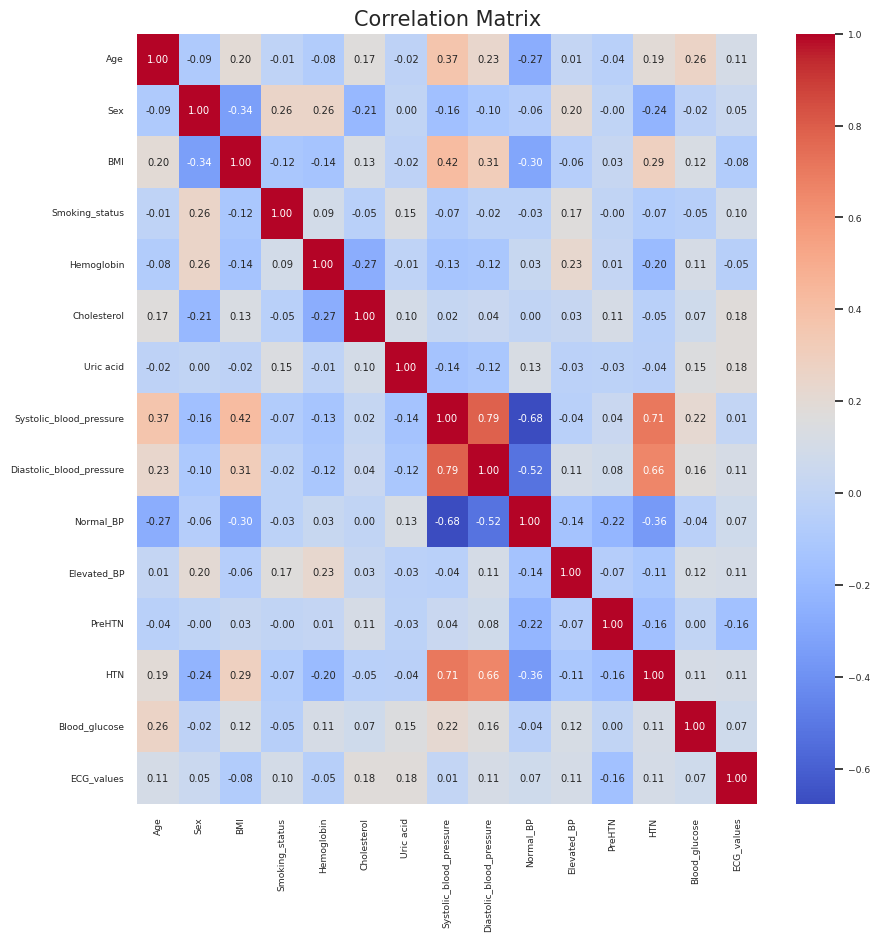

In [93]:
# Heatmap for correlation between variables
f, ax = plt.subplots(figsize= [10,10])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "coolwarm" )
ax.set_title("Correlation Matrix", fontsize=15)
plt.savefig(f"{images_dir}/correlation_matrix.jpeg")

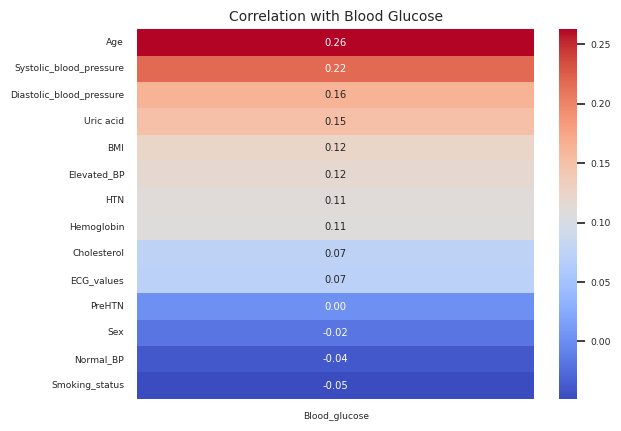

In [94]:
# Sort correlation values in descending order
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['Blood_glucose'].drop('Blood_glucose')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.set(font_scale=0.6)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Blood Glucose', fontsize=10)
plt.savefig(f"{images_dir}/correlation of variables.jpeg")

2. TRAINING MACHINE LEARNING MODELS

In [95]:
x = data.drop('Blood_glucose', axis=1)
y = data['Blood_glucose']

In [96]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [97]:
#Split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=4)
# Printing the size of the training and testing dataset
print("The size of the training dataset: ", X_train.size)
print("The size of the testing dataset: ", X_test.size)

The size of the training dataset:  2184
The size of the testing dataset:  546


This code is used to split the data into training and test sets for a machine learning model.
First, the code separates the features (x) and target (y) variables from the original dataset bank_data using the drop() method.
The drop() method is used to remove a specified column from the dataset. In this case, the column 'y' is removed from the dataset and assigned to the variable x.
The column 'y' is assigned to the variable y.
Next, the train_test_split() function from the scikit-learn library is used to split the data into training and test sets.
The function takes four arguments: the scaled features (X), the target (y), the test size (0.2 in this case), and a random state (which is not specified in this code).
The test size argument specifies the proportion of the data that should be used for testing the model.
In this case, 20% of the data is used for testing and 80% is used for training.
The function returns four variables: X_train, X_test, y_train, and y_test. These variables contain the training and test sets for the features and target variables. • The training sets are used to train the machine learning model, and the test sets are used to evaluate the performance of the model.

In [98]:
#Function of measure performance
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1'])
    cm.plot()

In [99]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

This code creates an instance of the RandomForestClassifier class and assigns it to the variable model_rf.
Then, it fits the model to the training data X_train and y_train using the fit() method.
The RandomForestClassifier is a machine learning algorithm that creates a forest of decision trees and combines their predictions to make a final prediction.
The fit() method trains the model on the input data by adjusting the parameters of the decision trees to minimize the error between the predicted and actual values.
Overall, this code trains a random forest classifier on the training data X_train and y_train.

In [100]:
y_pred_rf = model_rf.predict(X_test)

This code uses the predict method of a RandomForestClassifier object (rf) to make predictions on a set of test data (X_test).
The predicted values are then stored in the variable y_pred_rf. This is a common step in machine learning workflows, where the model is trained on a set of training data and then used to make predictions on new, unseen data.

Precision :  0.8205128205128205
Recall :  0.8205128205128205
Accuracy :  0.8205128205128205
F1 Score :  0.8205128205128205

 [[32  0]
 [ 7  0]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       0.00      0.00      0.00         7

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39

******************************************************

RF-Confusion Matrix


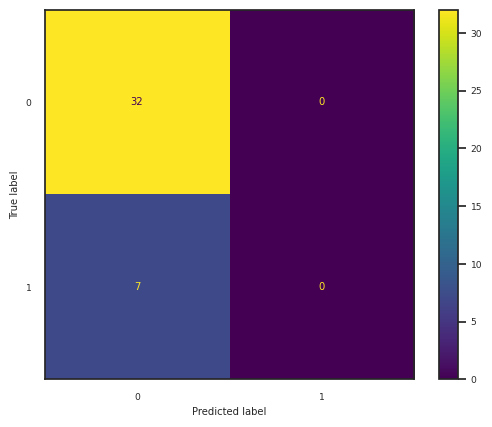

In [101]:
perform(y_pred_rf)
plt.savefig(f"{images_dir}/RandomForestClassifier.jpeg")
print("RF-Confusion Matrix")

In [102]:
pickle_out = open("Lung_Cancer_RF.pickle", "wb")
pickle.dump(model_rf, pickle_out)
pickle_out.close()
print("Model Saved.")

Model Saved.


In [103]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [104]:
y_pred_ada = model_ada.predict(X_test)

Precision :  0.8205128205128205
Recall :  0.8205128205128205
Accuracy :  0.8205128205128205
F1 Score :  0.8205128205128205

 [[31  1]
 [ 6  1]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.50      0.14      0.22         7

    accuracy                           0.82        39
   macro avg       0.67      0.56      0.56        39
weighted avg       0.78      0.82      0.78        39

******************************************************



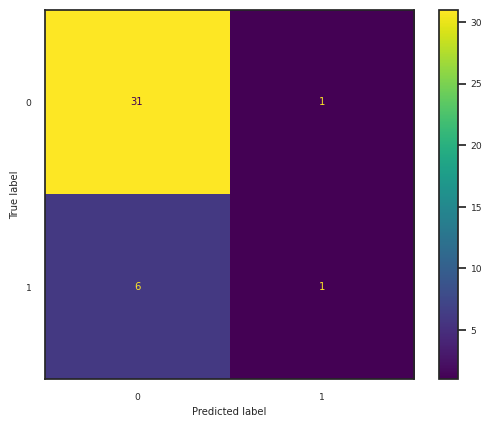

In [105]:
perform(y_pred_ada)

In [106]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
y_pred_dt = model_dt.predict(X_test)

Precision :  0.6923076923076923
Recall :  0.6923076923076923
Accuracy :  0.6923076923076923
F1 Score :  0.6923076923076923

 [[26  6]
 [ 6  1]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.14      0.14      0.14         7

    accuracy                           0.69        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.69      0.69      0.69        39

******************************************************

DecisionTree-Confusion Matrix


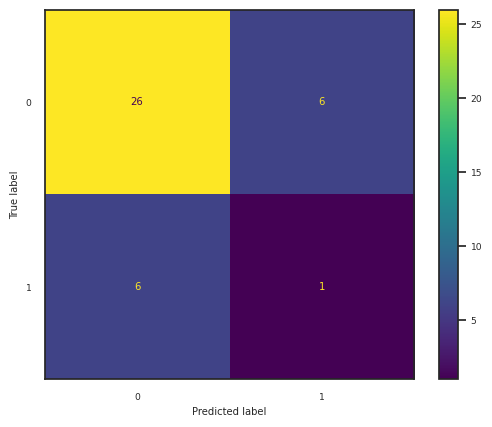

In [108]:
perform(y_pred_dt)
plt.savefig(f"{images_dir}/DecisionTree.jpeg")
print("DecisionTree-Confusion Matrix")

In [40]:
pickle_out = open("Lung_Cancer_dt.pickle", "wb")
pickle.dump(model_dt, pickle_out)
pickle_out.close()
print("Model Saved.")

Model Saved.


In [109]:
feature_names = x.columns[0:14]
viz = data.copy()
viz["Blood_glucose"]=viz["Blood_glucose"].values.astype(str)
print(viz.dtypes)
target_names = viz['Blood_glucose'].unique().tolist()

Age                           int64
Sex                           int64
BMI                         float64
Smoking_status                int64
Hemoglobin                  float64
Cholesterol                 float64
Uric acid                   float64
Systolic_blood_pressure       int64
Diastolic_blood_pressure      int64
Normal_BP                     int64
Elevated_BP                   int64
PreHTN                        int64
HTN                           int64
Blood_glucose                object
ECG_values                    int64
dtype: object


In [110]:
feature_names

Index(['Age', 'Sex', 'BMI', 'Smoking_status', 'Hemoglobin', 'Cholesterol',
       'Uric acid', 'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Normal_BP', 'Elevated_BP', 'PreHTN', 'HTN', 'ECG_values'],
      dtype='object')

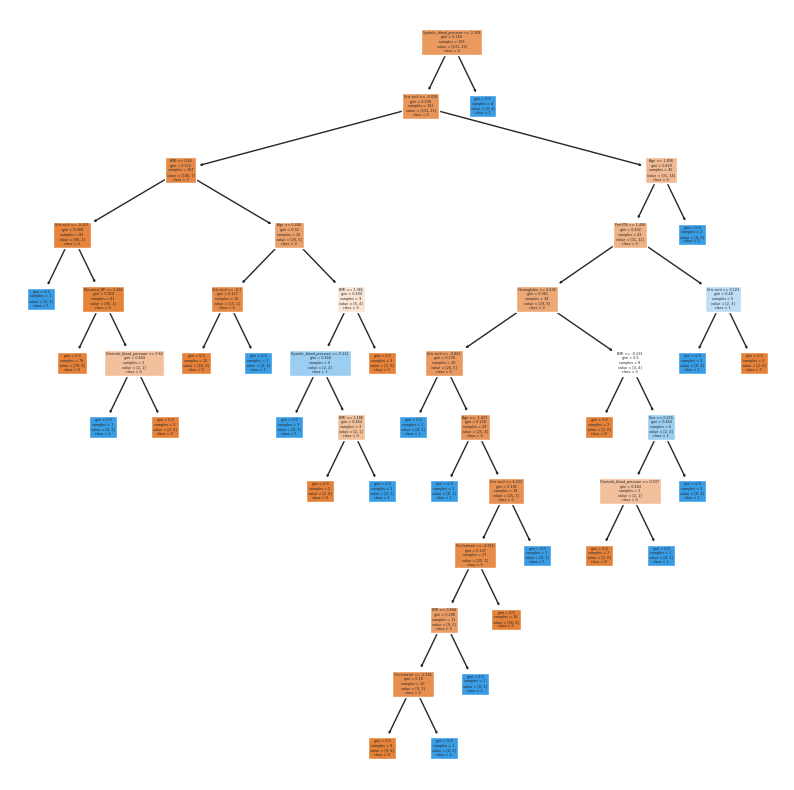

In [111]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(10, 10))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)
plt.savefig(f"{images_dir}/DecisionTree.jpeg")

In [112]:
pip install dtreeviz

In [113]:
import dtreeviz

viz_model = dtreeviz.model(model_dt,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name='Blood_glucose',
                           class_names=['0', '1'])

v = viz_model.view()     # render as SVG into internal object
v.save("Blood_glucose.svg")  # save as svg
plt.savefig(f"{images_dir}/Viz_model_view.jpeg")

<Figure size 640x480 with 0 Axes>

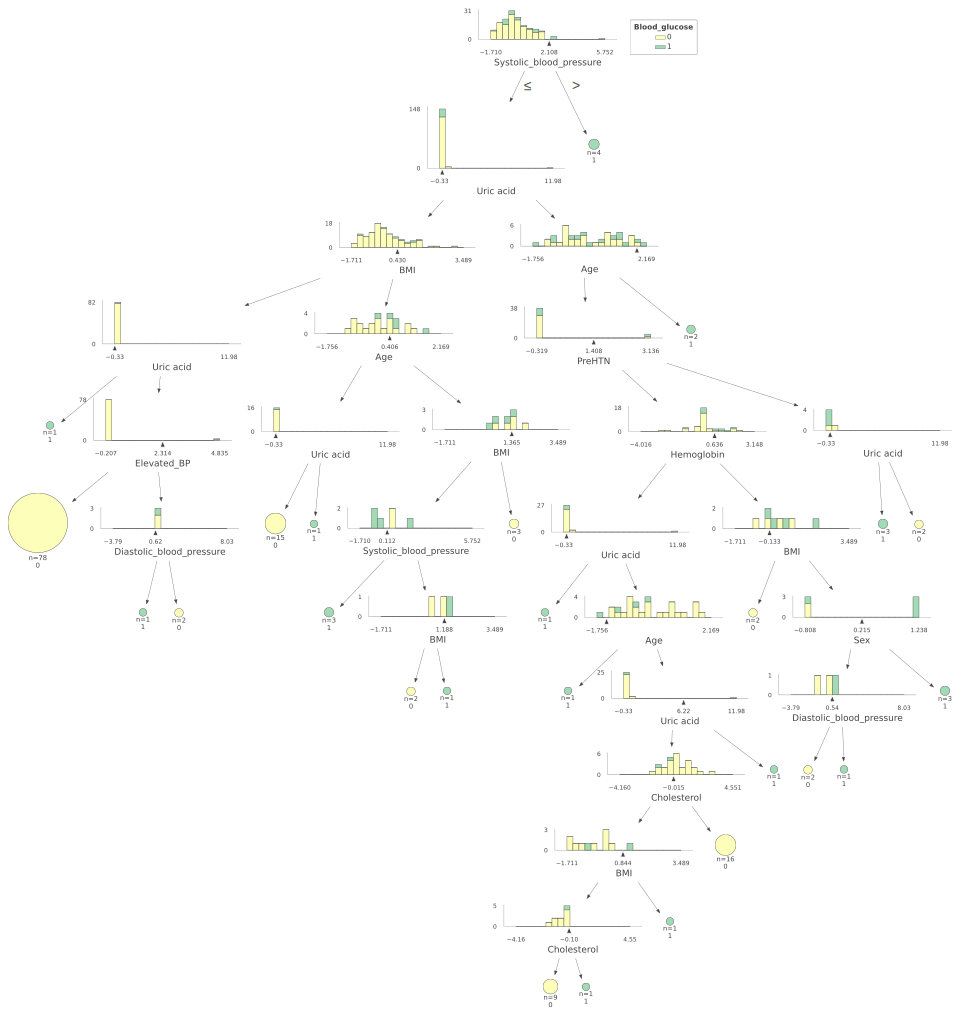

In [114]:
viz_model.view()

In [47]:
pip install lazypredict

In [115]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [116]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=4,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
#clear_output()

100%|██████████| 29/29 [00:02<00:00, 12.87it/s]

[LightGBM] [Info] Number of positive: 25, number of negative: 131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160256 -> initscore=-1.656321
[LightGBM] [Info] Start training from score -1.656321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [117]:
models.sort_values(by="Accuracy",ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.82,0.50,0.50,0.74,0.18
DummyClassifier,0.82,0.50,0.50,0.74,0.03
AdaBoostClassifier,0.82,0.56,0.56,0.78,0.24
SVC,0.82,0.50,0.50,0.74,0.02
BernoulliNB,0.82,0.61,0.61,0.80,0.04
CalibratedClassifierCV,0.79,0.48,0.48,0.73,0.25
KNeighborsClassifier,0.79,0.48,0.48,0.73,0.10
BaggingClassifier,0.79,0.48,0.48,0.73,0.06
PassiveAggressiveClassifier,0.79,0.65,0.65,0.79,0.03


In [118]:
import plotly.express as px

In [119]:
models_sorted = models.sort_values(by="Accuracy", ascending=False)

line = px.line(data_frame=models_sorted, y=["Accuracy"], markers=True)

line.update_xaxes(title="Model", rangeslider_visible=False)
line.update_yaxes(title="Accuracy")
line.update_traces(line_color="red")
line.update_layout(
    showlegend=True,
    title={
        'text': 'Accuracy vs Model',
        'y': 0.94,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

line.show()
plt.savefig(f"{images_dir}/Accuracy vs model.jpeg")

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       0.00      0.00      0.00         7

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39

Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.15
Test F1 Score: 0.8205128205128205


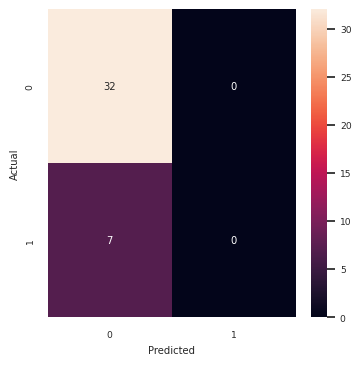

In [120]:
hyperparameter = RandomForestClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
grid_search = GridSearchCV(hyperparameter, param_grid, scoring='f1', cv=10)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'micro')

confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1)
plt.savefig(f"{images_dir}/Hyperparameter1.jpeg")

# Now let's see what we will get when class imbalance is addressed

SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is designed to tackle the underrepresentation of the minority class. It achieves this by creating synthetic instances for the minority class. It identifies individual minority class samples and generates new synthetic examples by interpolating between these samples and their nearest neighbors. By doing so, SMOTE rebalances the class distribution, making it more equitable. This can be crucial because imbalanced datasets often lead to models favoring the majority class and yielding biased results. SMOTE helps mitigate this bias.

In [121]:
from sklearn.decomposition import PCA
import pylab as pl
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import (SMOTE,
                                    ADASYN)
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)

In [122]:
from collections import Counter

In [123]:
oversample = RandomOverSampler(sampling_strategy='minority')
smote = SMOTE(sampling_strategy='minority')
X_resampled_over, y_resampled_over = oversample.fit_resample(X, y)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
print("SMOTE:", Counter(y_resampled_smote))

SMOTE: Counter({0: 163, 1: 163})


In [124]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=4)

In [127]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=7,
                     classifiers='all')

models, predictions = clf.fit(X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled)
#clear_output()

100%|██████████| 29/29 [00:01<00:00, 29.00it/s]

[LightGBM] [Info] Number of positive: 128, number of negative: 132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [128]:
ab = models.sort_values(by="Accuracy",ascending=False)
ab.to_csv('/content/gdrive/My Drive/Images_for_diabetes_prediction_NIH/name_csv_file.csv')

In [129]:
models_sorted = models.sort_values(by="Accuracy", ascending=False)

line = px.line(data_frame=models_sorted, y=["Accuracy"], markers=True)

line.update_xaxes(title="Model", rangeslider_visible=False)
line.update_yaxes(title="Accuracy")
line.update_traces(line_color="red")
line.update_layout(
    showlegend=True,
    title={
        'text': 'Accuracy vs Model',
        'y': 0.99,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

line.show()
plt.savefig(f"{images_dir}/Accuracy vs model_imbalance_addressed.jpeg")

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.85      0.97      0.91        35

    accuracy                           0.89        66
   macro avg       0.91      0.89      0.89        66
weighted avg       0.90      0.89      0.89        66

Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.8737639116949463
Test F1 Score: 0.8939393939393939


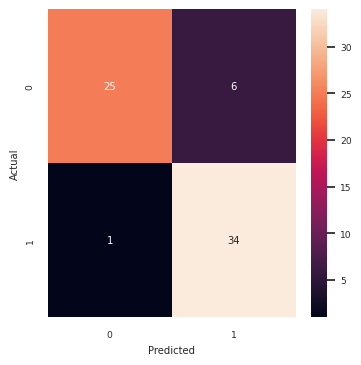

In [130]:
hyperparameter = RandomForestClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
grid_search = GridSearchCV(hyperparameter, param_grid, scoring='f1', cv=10)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_

y_pred_resampled = best_model.predict(X_test_resampled)
f1 = f1_score(y_test_resampled, y_pred_resampled, average = 'micro')

confusion=confusion_matrix(y_test_resampled,y_pred_resampled)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test_resampled,y_pred_resampled))

print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1)
plt.savefig(f"{images_dir}/Hyperparameter2.jpeg")

In [131]:
#Function of measure performance
def perform(y1_pred):
    print("Precision : ", precision_score(y_test_resampled, y1_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test_resampled, y1_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test_resampled, y1_pred))
    print("F1 Score : ", f1_score(y_test_resampled, y1_pred, average = 'micro'))
    cm = confusion_matrix(y_test_resampled, y1_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test_resampled, y1_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0', '1'])
    cm.plot()

In [132]:
model_rf1 = RandomForestClassifier()
model_rf1.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [133]:
y1_pred_rf = model_rf1.predict(X_test_resampled)

Precision :  0.9242424242424242
Recall :  0.9242424242424242
Accuracy :  0.9242424242424242
F1 Score :  0.9242424242424242

 [[26  5]
 [ 0 35]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        31
           1       0.88      1.00      0.93        35

    accuracy                           0.92        66
   macro avg       0.94      0.92      0.92        66
weighted avg       0.93      0.92      0.92        66

******************************************************

RF-Confusion Matrix


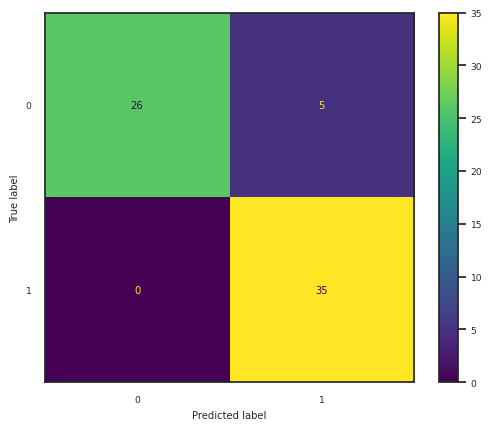

In [134]:
perform(y1_pred_rf)
plt.savefig(f"{images_dir}/RandomForestClassifier1.jpeg")
print("RF-Confusion Matrix")

In [135]:
pickle_out = open("Lung_Cancer_RF_resampled.pickle", "wb")
pickle.dump(model_rf1, pickle_out)
pickle_out.close()
print("Model Saved.")

Model Saved.


In [128]:
model = None

def load_model():
    global model
    # model variable refers to the global variable
    with open('Lung_Cancer_RF_resampled.pickle', 'rb') as f:
        model = pickle.load(f)

Here, we define a global variable called ‘model’ and populate it within the load_model() function.

Next, we instantiate a Flask object called 'app'

In [132]:
pip install flask

In [133]:
from flask import Flask

In [134]:
app = Flask(__name__)

In [135]:
#Now, we define a home endpoint, which when hit, returns a ‘Hello World!’ message.
@app.route('/')
def home_endpoint():
    return 'Hello World!'

Now, we define a ‘predict’ endpoint. The endpoint accepts a ‘POST’ request wherein the test data on which we wish to get a prediction is received by the endpoint. Keeping things simple, the function works only when a single test sample needs to be predicted (won’t work if multiple samples need to be predicted in a single call to the endpoint).


In [136]:
@app.route('/predict', methods=['POST'])
def get_prediction():
    # Works only for a single sample
    if request.method == 'POST':
        test_data = request.get_json()  # Get data posted as a json
        test_data = np.array(test_data)[np.newaxis, :]  # converts shape from (4,) to (1, 4)
        prediction = model.predict(test_data)  # runs globally loaded model on the data
    return str(prediction[0])

In [140]:
#Declare the main function
if __name__ == '__main__':
    load_model()  # load model at the beginning once only
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


SyntaxError: ignored

# Feature Importance

In [124]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=4)
clf2.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=4)

In [125]:
importances = clf2.feature_importances_
for feature, importance in zip(x, importances):
    print(feature, importance)

Age 0.15185585671379173
Sex 0.0377841944198818
BMI 0.15341102657691247
Smoking_status 0.005743174710958395
Hemoglobin 0.08826217951475039
Cholesterol 0.09037697900539693
Uric acid 0.18146020605394644
Systolic_blood_pressure 0.10240552905213217
Diastolic_blood_pressure 0.08848013617242602
Normal_BP 0.028956122310557643
Elevated_BP 0.01697161742490572
PreHTN 0.006335640884172249
HTN 0.014214426133553879
ECG_values 0.03374291102661412


In [126]:
# Create a dataframe for feature importance
# Create a dataframe for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)

                     Feature  Importance
6                  Uric acid        0.18
2                        BMI        0.15
0                        Age        0.15
7    Systolic_blood_pressure        0.10
5                Cholesterol        0.09
8   Diastolic_blood_pressure        0.09
4                 Hemoglobin        0.09
1                        Sex        0.04
13                ECG_values        0.03
9                  Normal_BP        0.03
10               Elevated_BP        0.02
12                       HTN        0.01
11                    PreHTN        0.01
3             Smoking_status        0.01


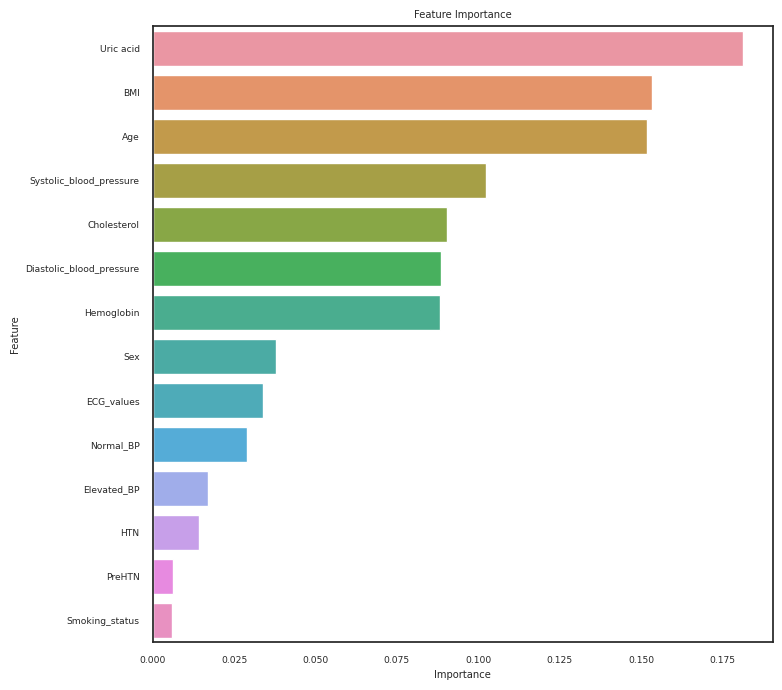

In [127]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
#plt.show()
plt.savefig(f"{images_dir}/FeatureImportance.jpeg")

The feature importance results provide insight into which features are most associated with elevated blood glucose level using our Random Forest model. The importance of a feature is calculated based on how much the tree nodes that use that feature reduce impurity across all trees in the forest.

The key findings show that uric acid is the most important feature associated with elevated blood sugar followed by age, systolic blood pressure and body mass index (BMI).

These results, however, should be interpreted with caution. The importance of a feature in a Random Forest model doesn't necessarily mean a casual relationship, and it is specific to this model and this dataset. Other models might find different results if additional features are introduced Furthermore, low importance does not mean that the feature is unimportant for predicting bllod sugar level in general, it could just mean that the feature is not useful in the presence of one or more features. A thorough feature analysis and larger dataset should be considered for a better understanding of the contribution of each feature in the prediction.

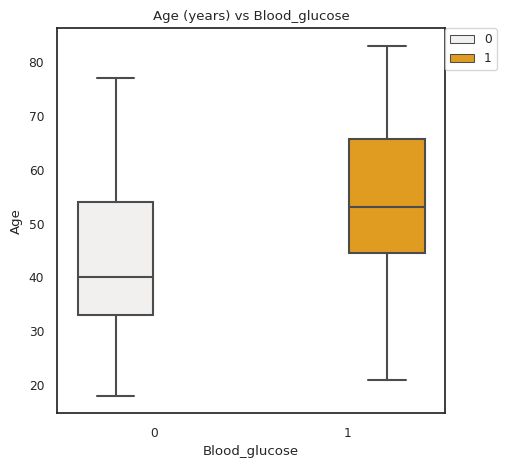

In [ ]:
# Boxplot Age vs Diabetes classification
plt.figure(figsize=(5, 5))
sns.boxplot(x='Blood_glucose', y='Age', hue = 'Blood_glucose', color = 'orange', data=data)
plt.title('Age (years) vs Blood_glucose')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

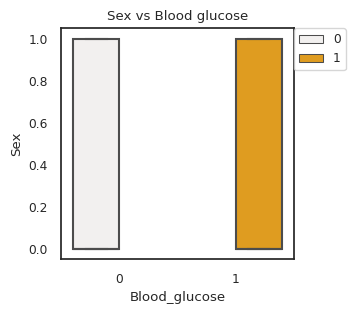

In [ ]:
# Boxplot Age vs Diabetes classification
plt.figure(figsize=(3, 3))
sns.boxplot(x='Blood_glucose', y='Sex', hue = 'Blood_glucose', color = 'orange', data=data)
plt.title('Sex vs Blood glucose')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()

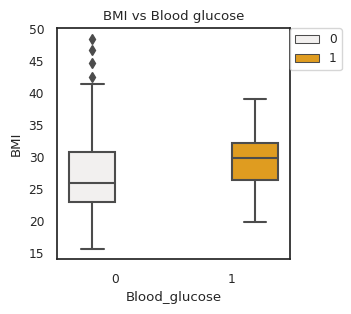

In [ ]:
# Boxplot Age vs Diabetes classification
plt.figure(figsize=(3, 3))
sns.boxplot(x='Blood_glucose', y='BMI', hue = 'Blood_glucose', color = 'orange', data=data)
plt.title('BMI vs Blood glucose')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.show()